#  BIKE SHARING ASSIGNMENT

#### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

	
 day.csv have the following fields:
 
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [522]:
# Import All the required Libraries for data Import , EDA, and model Building

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [523]:
# import csv data file
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [524]:
# checking shape of data and other information

print("data shape is", data.shape)
data.info()


data shape is (730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [525]:
# checking for null values if present in data
data.isnull().sum()
# no null values in dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [526]:
# Basic statistical properties of data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


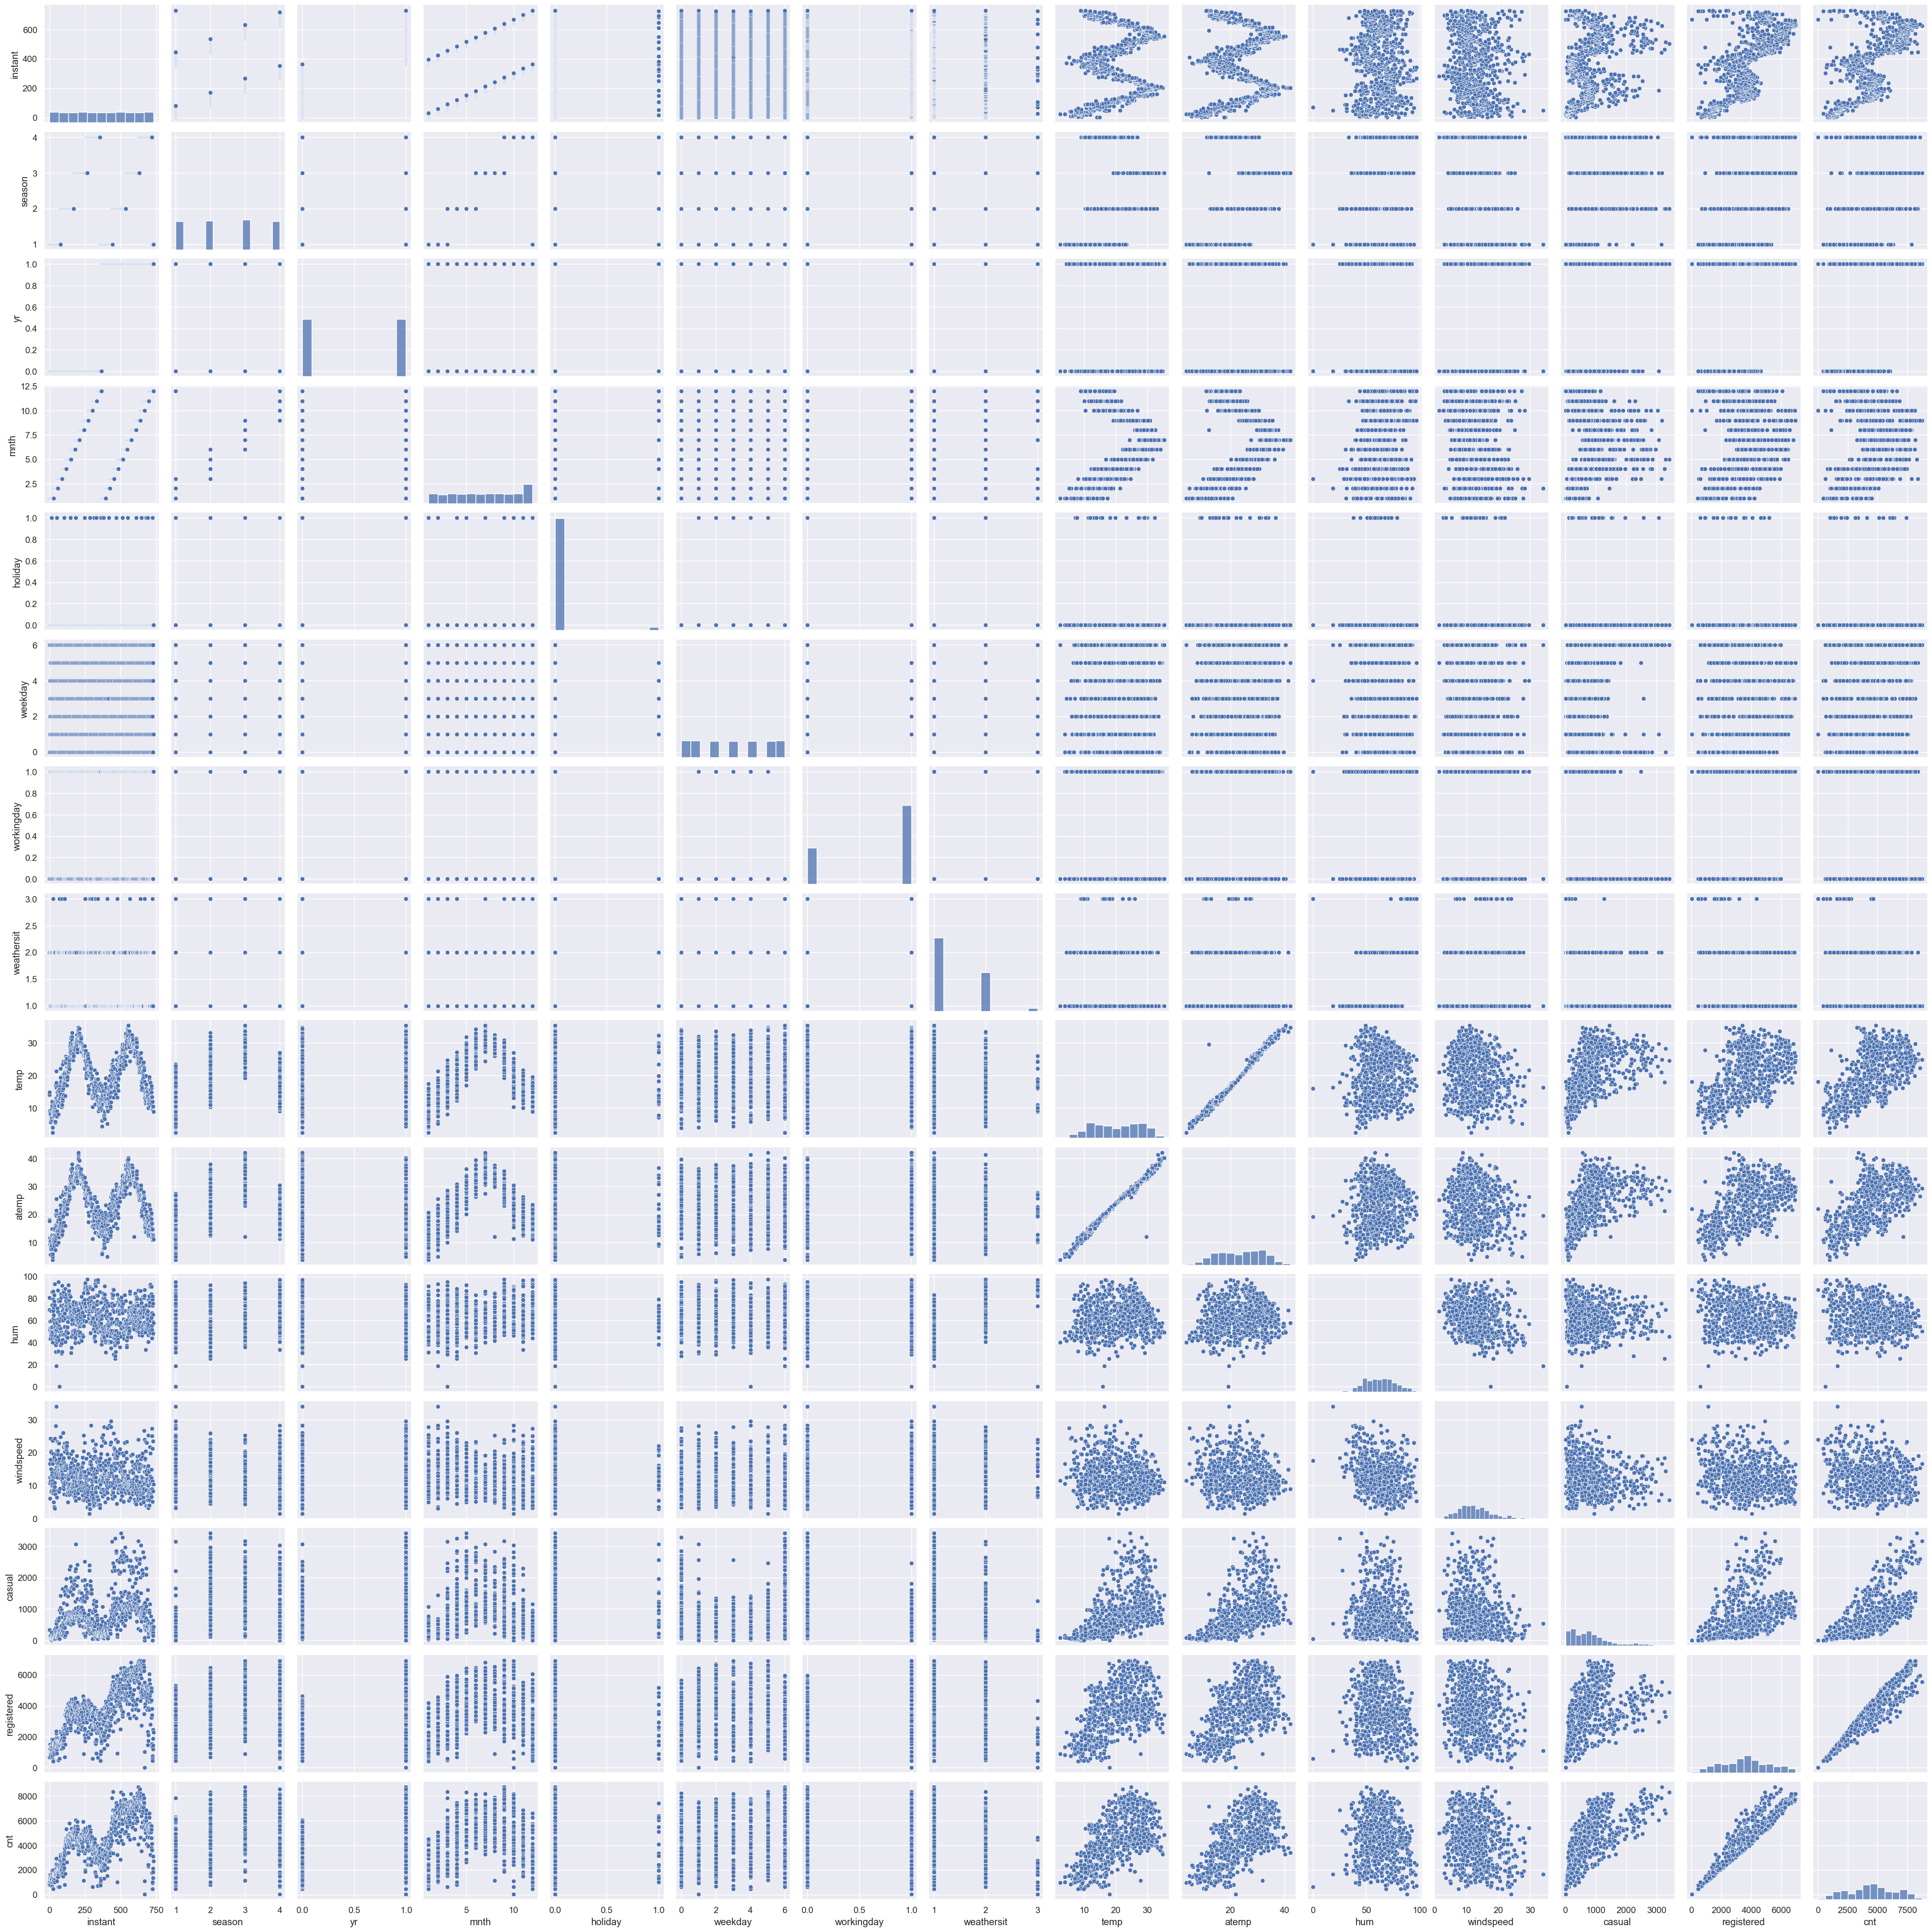

In [527]:
# To check relationship between columns for every other column data
sns.pairplot(data)
plt.show()

In [528]:
# Assigning string values to different seasons instead of numeric values. 
data['season'] = data['season'].map({1: 'S_spring', 2: 'S_summer',3: 'S_fall', 4: 'S_winter'})


In [529]:
# Assigning string values to different months instead of numeric values 
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',8: 'August',9: 'Sept',10: 'October',11: 'November',12: 'December'})

# Applying the function to the two columns
data[['mnth']] = data[['mnth']].apply(object_map)

In [530]:
# Assigning string values to weekdays instead of numeric values. 
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wedneday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6: 'Monday', 0: 'Tuesday'})

# Applying the function to the two columns
data[['weekday']] = data[['weekday']].apply(str_map)

In [531]:
# Replacing long weathersit names into string values insted of numeric values.
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'Mist',3: 'Cloudy_light_rain', 4: 'Rainy_extreme'})


In [532]:
# Checking data after manipulations in column
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,S_spring,0,January,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,S_spring,0,January,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,S_spring,0,January,0,Wedneday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,S_spring,0,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,S_spring,0,January,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


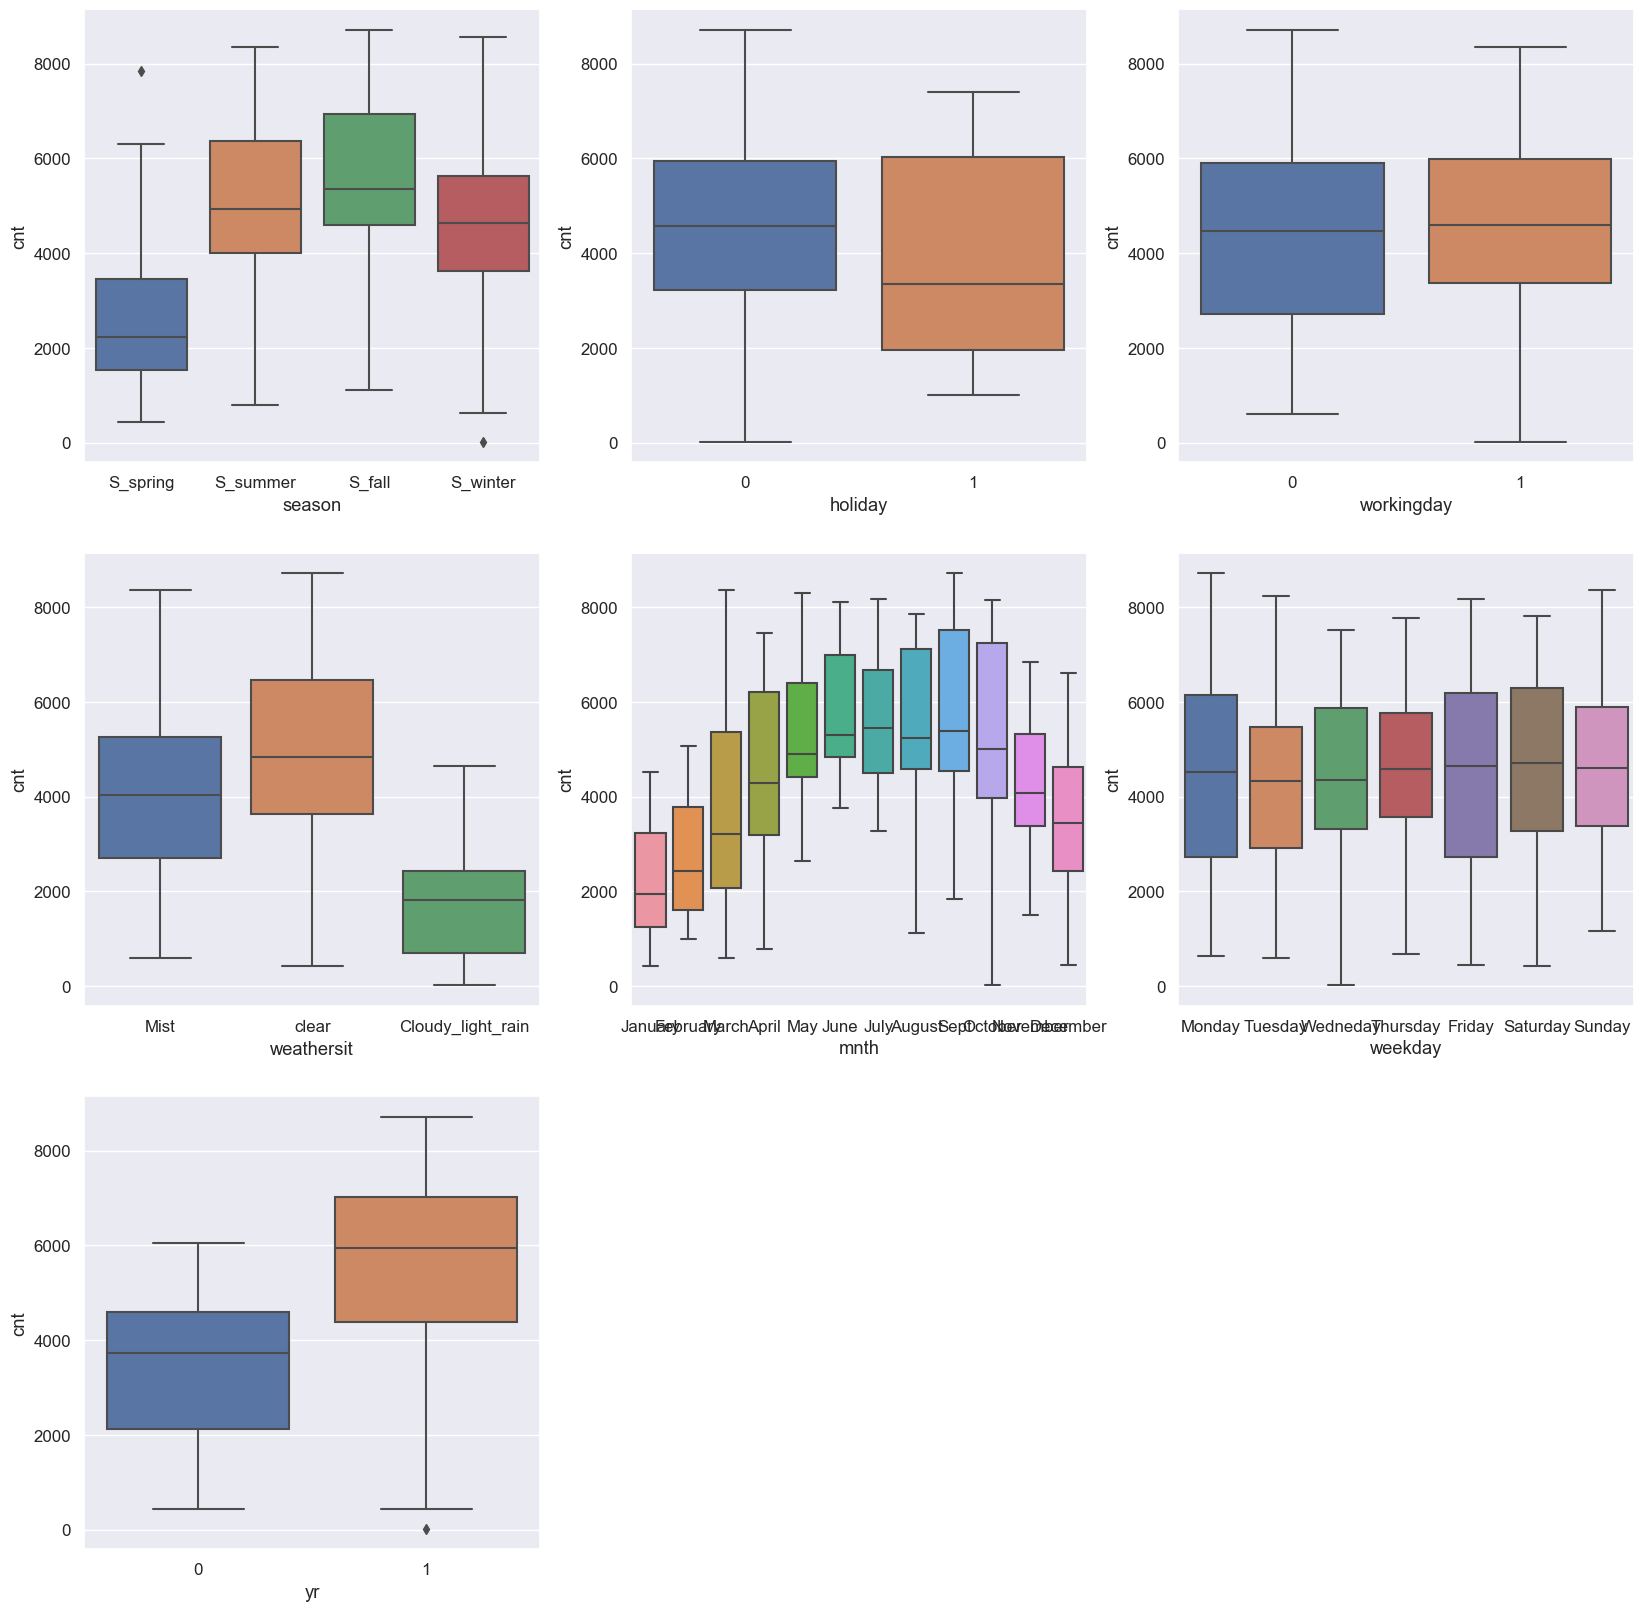

In [533]:
# Plotting box plot to understand the distribution of variables with respect to CNT

plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.show()

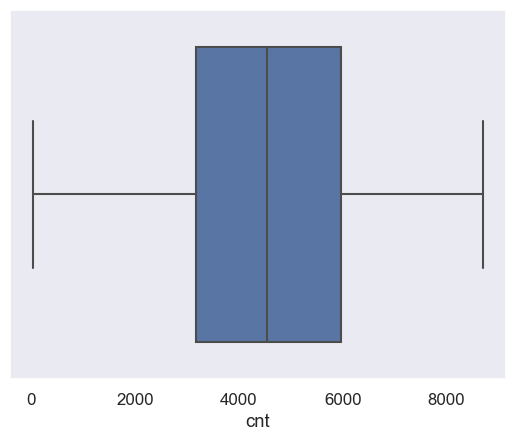

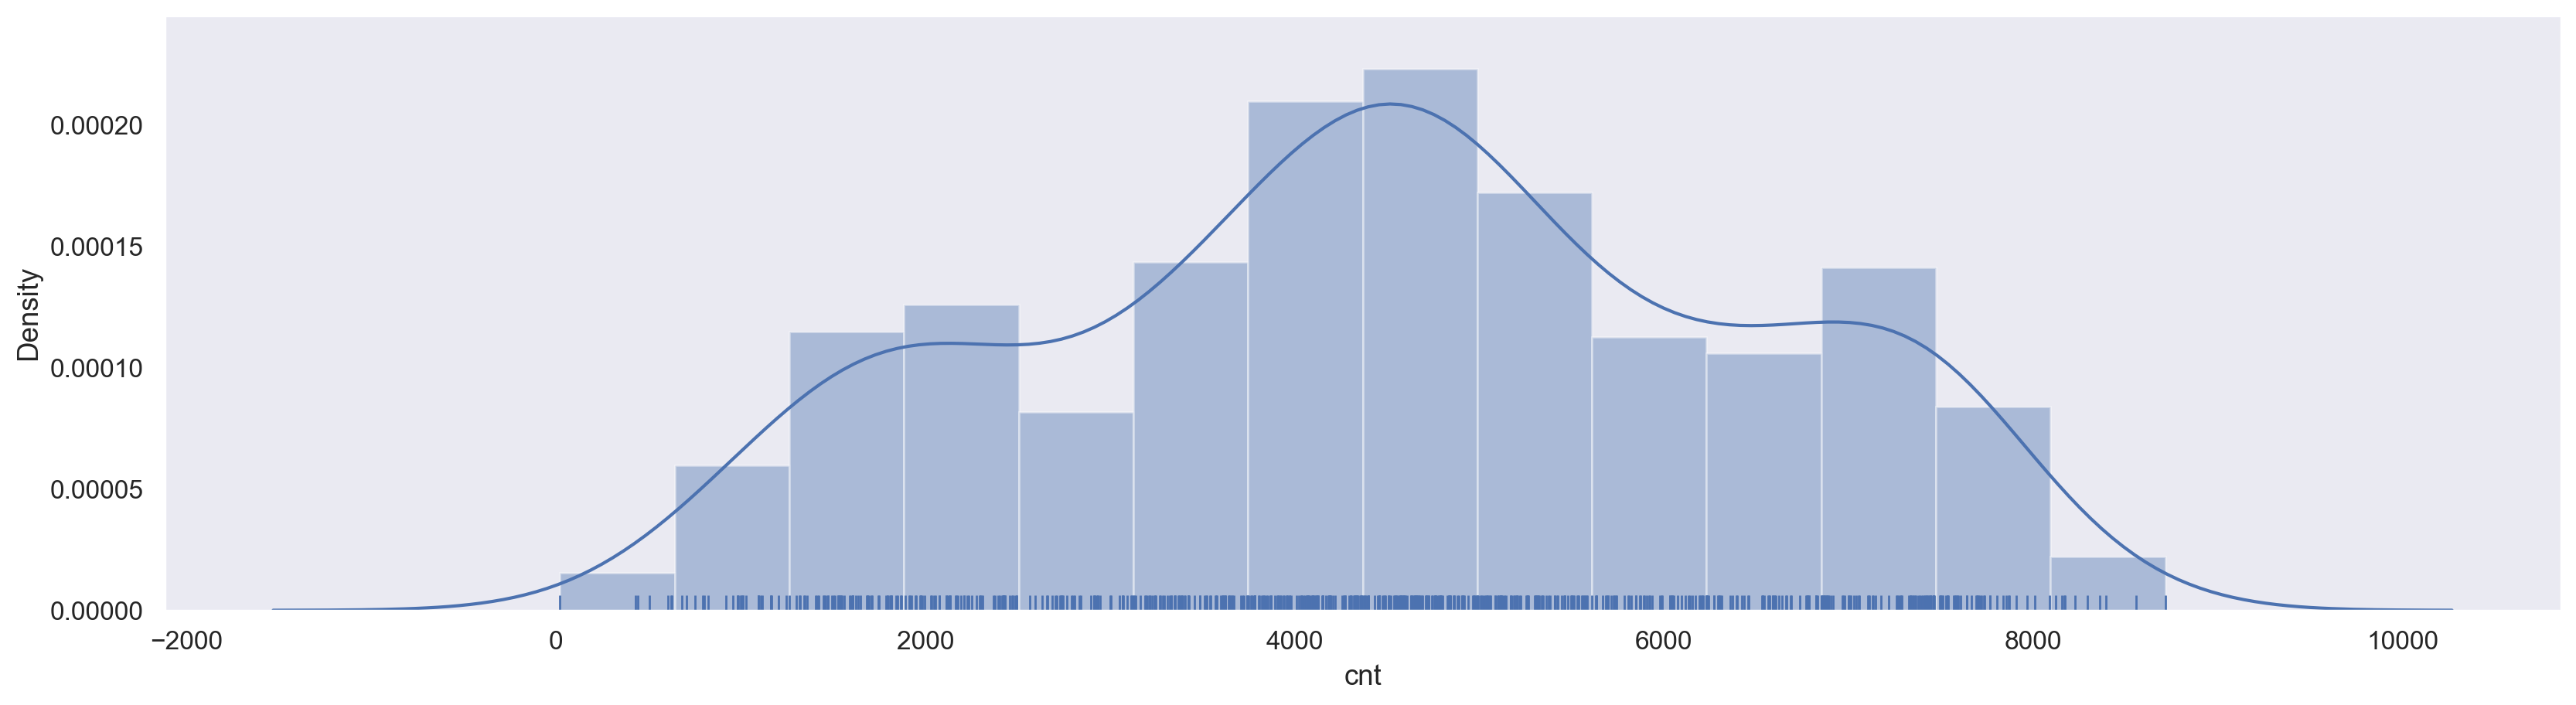

In [534]:
# from box plot and frequency distribution plot getting data distribution of cnt
sns.set_style("dark")
data.cnt.describe()
sns.boxplot(data.cnt)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.cnt,rug=True)
plt.show()

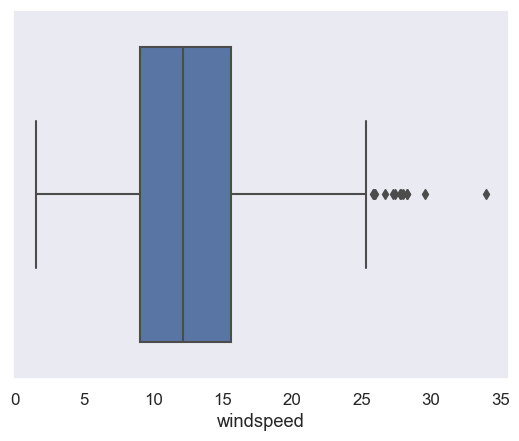

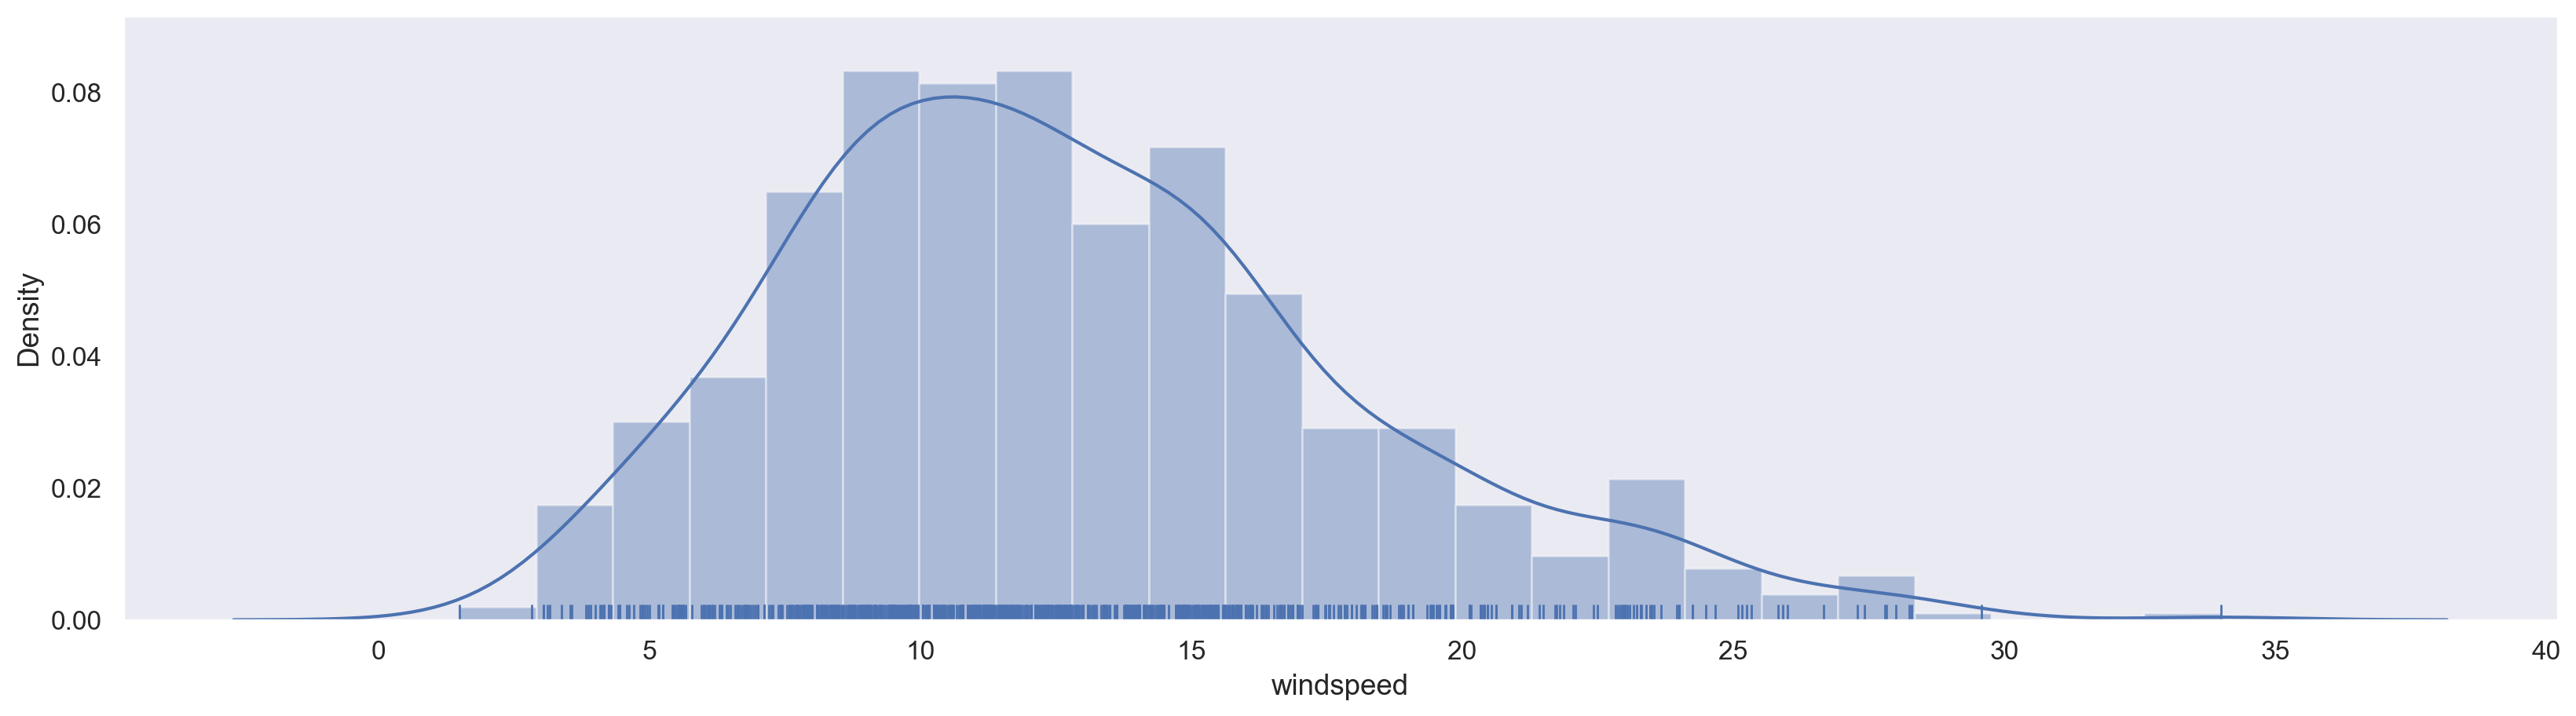

In [535]:
# from box plot and frequency distribution plot getting data distribution of windspeed
sns.set_style("dark")
data.windspeed.describe()
sns.boxplot(data.windspeed)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.windspeed,rug=True)
plt.show()

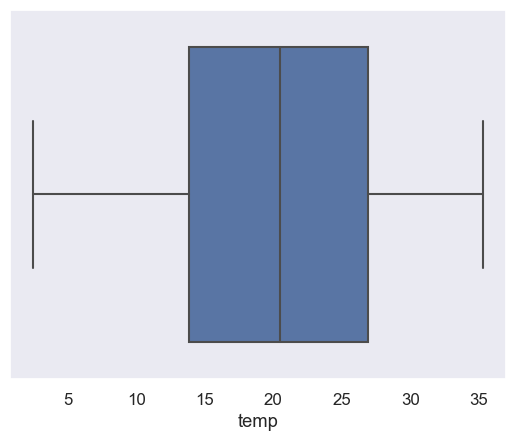

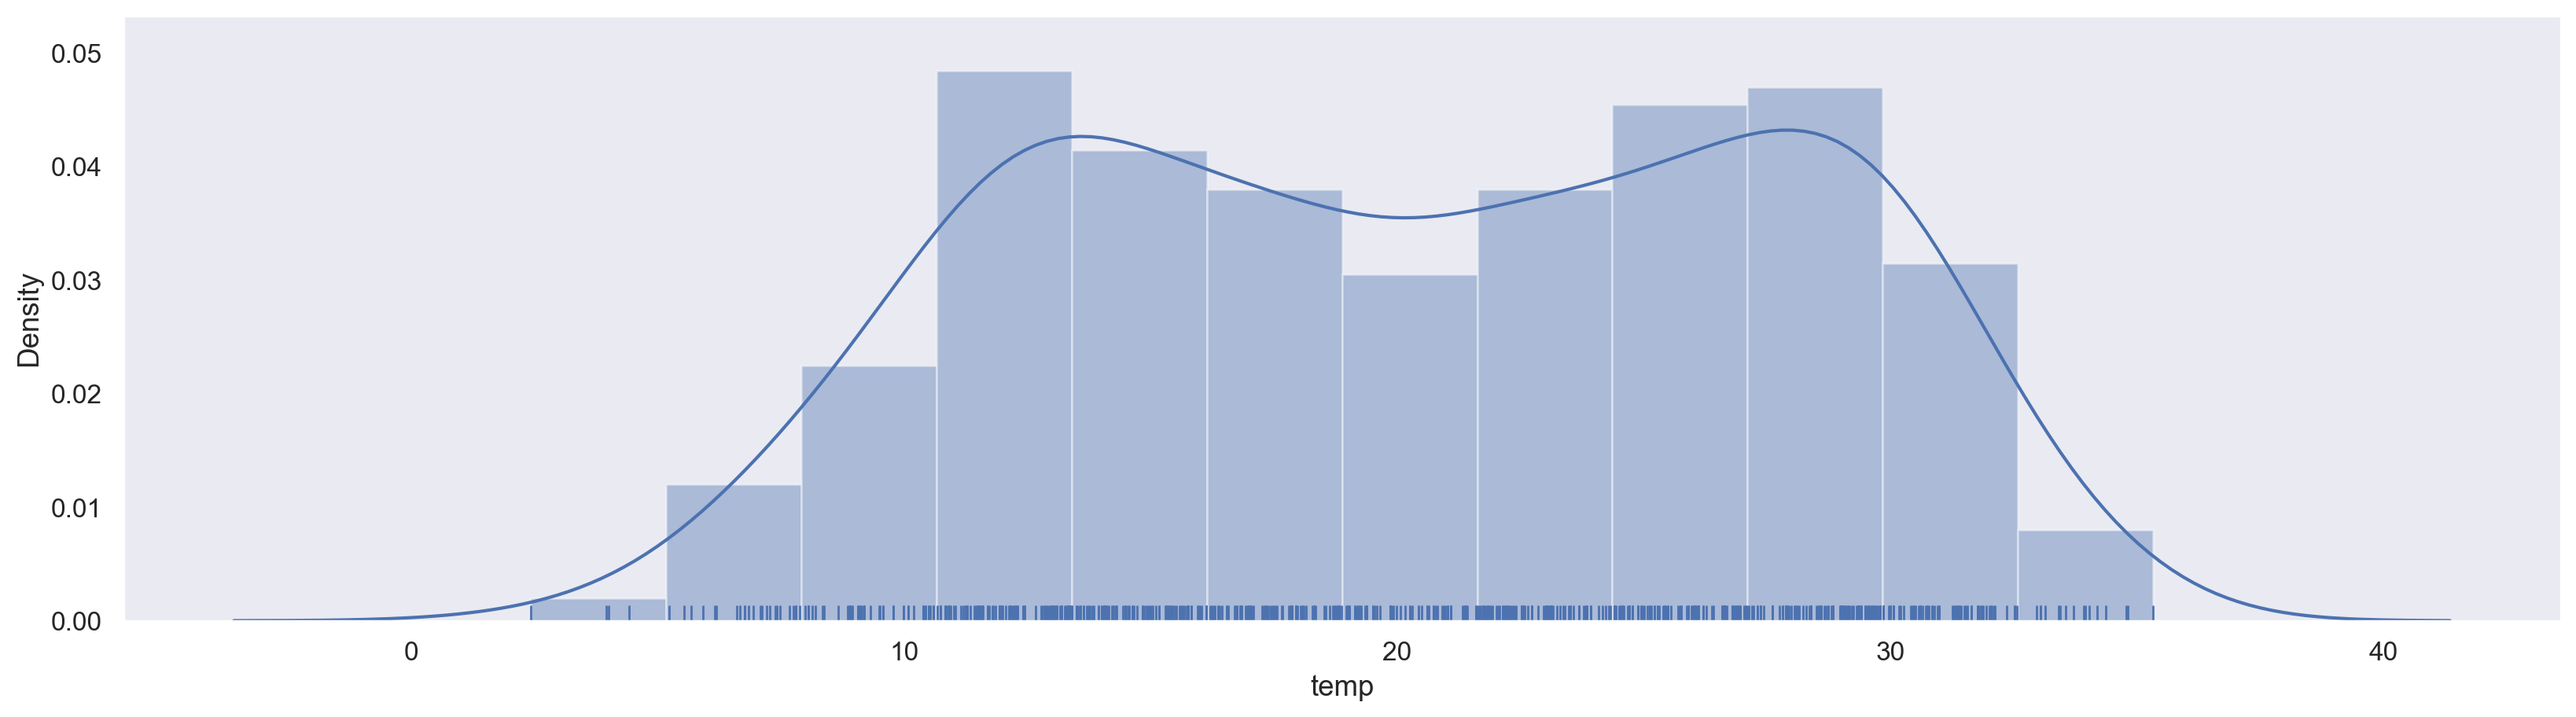

In [536]:

# from box plot and frequency distribution plot getting data distribution of temp
sns.set_style("dark")
data.temp.describe()
sns.boxplot(data.temp)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.temp,rug=True)
plt.show()

count        730
unique         4
top       S_fall
freq         188
Name: season, dtype: object
S_fall      188
S_summer    184
S_spring    180
S_winter    178
Name: season, dtype: int64


<AxesSubplot:xlabel='season', ylabel='count'>

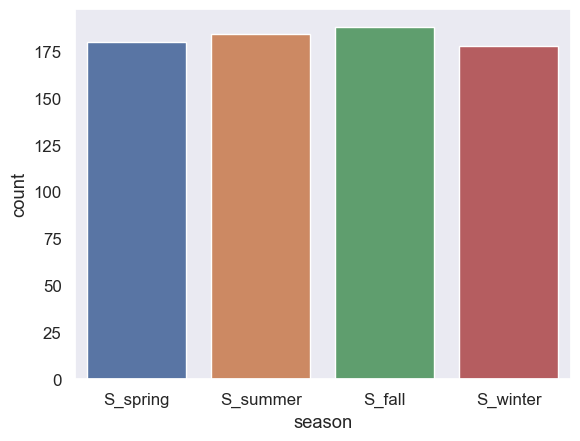

In [537]:
# from countplot plotting the season column to get frequency distribution

print(data['season'].describe())
print(data['season'].value_counts())
sns.countplot(data.season)

count         730
unique         12
top       January
freq           62
Name: mnth, dtype: object
January     62
March       62
May         62
July        62
August      62
October     62
December    62
April       60
June        60
Sept        60
November    60
February    56
Name: mnth, dtype: int64


<AxesSubplot:xlabel='mnth', ylabel='count'>

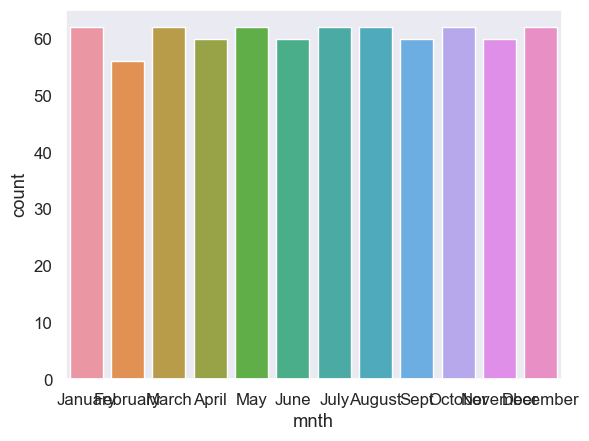

In [538]:
# from countplot plotting the mnth column to get frequency distribution

print(data['mnth'].describe())
print(data['mnth'].value_counts())
sns.countplot(data.mnth)

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64
0    709
1     21
Name: holiday, dtype: int64


<AxesSubplot:xlabel='holiday', ylabel='count'>

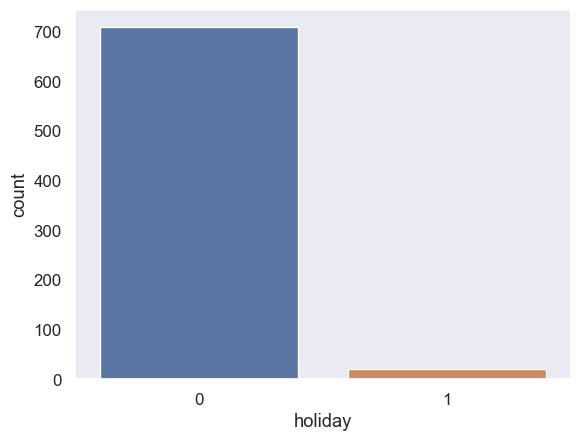

In [539]:
# from countplot plotting the holiday column to get frequency distribution

print(data['holiday'].describe())
print(data['holiday'].value_counts())
sns.countplot(data.holiday)


count       730
unique        3
top       clear
freq        463
Name: weathersit, dtype: object
clear                463
Mist                 246
Cloudy_light_rain     21
Name: weathersit, dtype: int64


<AxesSubplot:xlabel='weathersit', ylabel='count'>

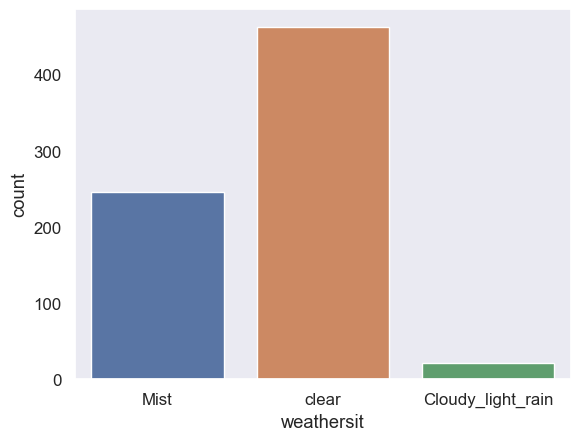

In [540]:
# from countplot plotting the weathersit column to get frequency distribution

print(data['weathersit'].describe())
print(data['weathersit'].value_counts())
sns.countplot(data.weathersit)

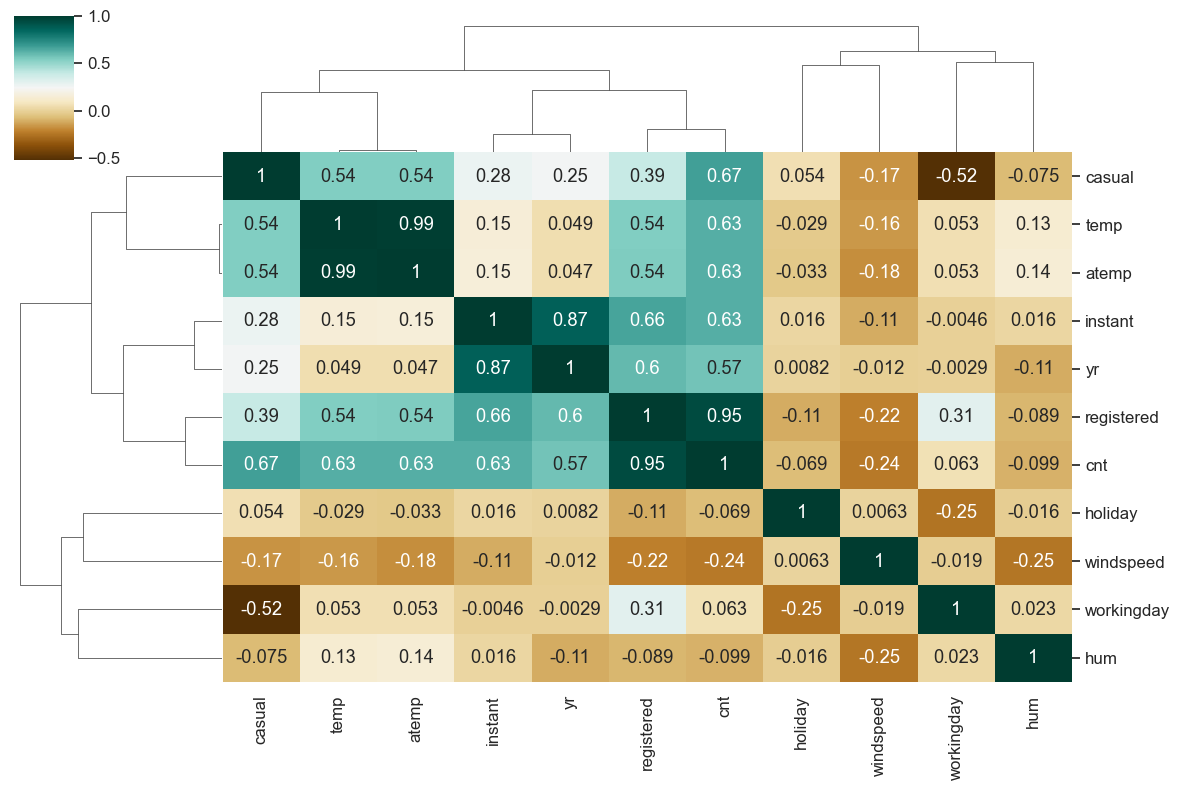

In [541]:
# multivariate analysis- Correlation Matrix
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_correlation = data.corr()
loan_correlation
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

# Multiple imsights from heatmap below
#temp and atemp is highly correlated
# registerd and casual is corrleted to cnt , as cnt is sum of registerd and casual

In [542]:
# Converting date to datetime format
data['dteday']=data['dteday'].astype('datetime64')

In [543]:
# seaprating the categorical columns

data_categorical=data[['season', 'mnth', 'weekday', 'weathersit']]

In [544]:
data_categorical

,season,mnth,weekday,weathersit
0,S_spring,January,Monday,Mist
1,S_spring,January,Tuesday,Mist
2,S_spring,January,Wedneday,clear
3,S_spring,January,Thursday,clear
4,S_spring,January,Friday,clear
...,...,...,...,...
725,S_spring,December,Saturday,Mist
726,S_spring,December,Sunday,Mist
727,S_spring,December,Monday,Mist
728,S_spring,December,Tuesday,clear


In [545]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
data=data.drop(['instant','dteday'], axis = 1, inplace = False)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,S_spring,0,January,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,S_spring,0,January,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,S_spring,0,January,0,Wedneday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,S_spring,0,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,S_spring,0,January,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [546]:
# Convert categorical columns data into dummies 
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,season_S_spring,season_S_summer,season_S_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wedneday,weathersit_Mist,weathersit_clear
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [547]:
# droping th categorical columns from data set as dummy variables data is to add in dataset
data = data.drop(list(data_categorical.columns), axis=1)

In [548]:
# concat existing dataset and dummy variable dataset
data = pd.concat([data, data_dummies], axis=1)

In [549]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [550]:
# Importing minmax scaler from  sklearn library
from sklearn.preprocessing import MinMaxScaler


In [551]:
scaler = MinMaxScaler()

In [552]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [553]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [554]:
# importing sm model from statmodel api
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const               0.033382
yr                  0.232208
holiday            -0.045141
workingday          0.041132
temp                0.401322
atemp               0.001329
hum                -0.151812
windspeed          -0.184388
season_S_spring    -0.048580
season_S_summer     0.038216
season_S_winter     0.105387
mnth_August         0.016076
mnth_December      -0.045572
mnth_February      -0.032176
mnth_January       -0.062565
mnth_July          -0.039277
mnth_June          -0.001704
mnth_March          0.001288
mnth_May            0.024691
mnth_November      -0.041783
mnth_October        0.007695
mnth_Sept           0.081806
weekday_Monday      0.045962
weekday_Saturday   -0.004017
weekday_Sunday      0.005733
weekday_Thursday   -0.013575
weekday_Tuesday    -0.008571
weekday_Wedneday   -0.015769
weathersit_Mist     0.195667
weathersit_clear    0.256697
dtype: float64

In [555]:
# Instantiate linear regression model
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [556]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.2322076  -0.05348668  0.03278612  0.40132173  0.00132911 -0.15181212
 -0.18438787 -0.04858014  0.03821569  0.10538739  0.01607601 -0.04557179
 -0.03217603 -0.06256549 -0.03927667 -0.00170354  0.00128797  0.02469107
 -0.0417827   0.00769492  0.08180574  0.03761659 -0.00401705  0.00573276
 -0.01357547 -0.01691602 -0.01576919  0.19566688  0.25669709]
0.04172761237905531


In [557]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          8.42e-181
Time:                        19:19:12   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0334      0.044      0.755      0.451      -0.053       0.120
yr                   0.2322      0.008     28.792      0.000       0.216       0.248
holiday             -0.0451      0.025     -1.803      0.072      -0.094       0.004
workingday           0.0411      0.014      3.040      0.002       0.015       0.068
temp                 0.4013      0.142      2.821      0.005       0.122       0.681
atemp                0.0013      0.004      0.366      0.714      -0.006       0.008
hum                 -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed           -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_S_spring     -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_S_summer      0.0382      0.026      1.455      0.146      -0.013       0.090
season_S_winter      0.1054      0.028      3.770      0.000       0.050       0.160
mnth_August          0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_December       -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_February       -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_January        -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_July           -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_June           -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_March           0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_May             0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_November       -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_October         0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sept            0.0818      0.032      2.549      0.011       0.019       0.145
weekday_Monday       0.0460      0.015      3.056      0.002       0.016       0.076
weekday_Saturday    -0.0040      0.015     -0.274      0.784      -0.033       0.025
weekday_Sunday       0.0057      0.015      0.384      0.701      -0.024       0.035
weekday_Thursday    -0.0136      0.015     -0.921      0.357      -0.043       0.015
weekday_Tuesday     -0.0086      0.016     -0.550      0.583      -0.039       0.022
weekday_Wedneday    -0.0158      0.015     -1.079      0.281      -0.044       0.013
weathersit_Mist      0.1957      0.025      7.810      0.000       0.146       0.245
weathersit_clear     0.2567      0.026      9.712      0.000       0.205       0.309
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   P

# As general information , while model building the model should be build on 7 -15 variables 
## considering top 15 features from dataset by Recurssive feature elimination

In [558]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm1 = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True False  True  True  True  True  True False False
 False  True  True False False False False False  True  True False False
 False False False  True  True]
[ 1  1  1  1 14  1  1  1  1  1  6  3  4  1  1 13 15  5  2 10  1  1 12 11
  9  7  8  1  1]


In [559]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_S_spring', 'season_S_summer', 'season_S_winter', 'mnth_January',
       'mnth_July', 'mnth_Sept', 'weekday_Monday', 'weathersit_Mist',
       'weathersit_clear'],
      dtype='object')

In [560]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          2.31e-191
Time:                        19:19:12   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0023      0.048  

In [561]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [562]:
a=X_train_rfe1.drop('const',axis=1)

In [563]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.64
3,temp,22.83
14,weathersit_clear,14.85
13,weathersit_Mist,9.02
6,season_S_spring,5.69
2,workingday,5.42
5,windspeed,4.68
8,season_S_winter,4.14
7,season_S_summer,3.20
0,yr,2.10


# As general information , while model building the model should be build on 7 -15 variables 
## considering top 7 features from dataset by Recurssive feature elimination

In [564]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=7,step=1)

# Fit with 7features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True False False  True False  True  True  True False False False False
 False False False False False False False False False False False False
 False False False  True  True]
[ 1  3  8  1 22  1  1  1  6  5 14 11 12  9  2 21 23 13 10 18  4  7 20 19
 17 15 16  1  1]


In [565]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_S_spring,weathersit_Mist,weathersit_clear
653,1.0,1,0.509887,0.575354,0.300794,0,0,1
576,1.0,1,0.815169,0.725633,0.264686,0,0,1
426,1.0,1,0.442393,0.640189,0.255342,1,1,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,1
482,1.0,1,0.395666,0.504508,0.188475,0,1,0


In [566]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     314.8
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          4.28e-179
Time:                        19:19:13   Log-Likelihood:                 468.08
No. Observations:                 510   AIC:                            -920.2
Df Residuals:                     502   BIC:                            -886.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1389      0.047  

## From above model summery 
### we can understand that model with top 7 features giving better accuracy and p values for features is also within range

In [567]:
a=X_train_rfe2.drop('const',axis=1)

In [568]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.73
6,weathersit_clear,11.10
1,temp,10.80
5,weathersit_Mist,7.82
3,windspeed,4.17
0,yr,2.06
4,season_S_spring,2.04


# VIF - variance inflation factor for hum is little high

In [569]:
# dropping hum and building a model again
X_train =X_train.drop(["hum","atemp"],axis=1) 

In [570]:
X_train

,yr,holiday,workingday,temp,windspeed,season_S_spring,season_S_summer,season_S_winter,mnth_August,mnth_December,...,mnth_October,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wedneday,weathersit_Mist,weathersit_clear
653,1,0,1,0.509887,0.300794,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.264686,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
426,1,0,0,0.442393,0.255342,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.663106,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
482,1,0,0,0.395666,0.188475,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.355596,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,0.863973,0.187140,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
53,0,0,1,0.202618,0.111379,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350,0,0,0,0.248216,0.431816,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [571]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe4 = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe4.fit(X_train, y_train)

# Print the boolean results
print(rfe4.support_)           
print(rfe4.ranking_)  

[ True  True  True  True  True  True False  True False  True False  True
  True False False False  True False  True  True False False False False
 False  True  True]
[ 1  1  1  1  1  1  4  1 11  1  2  1  1 12  9  7  1  8  1  1 13 10  6  3
  5  1  1]


In [572]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe4.support_]

# Subsetting training data for 15 selected columns
X_train_rfe4 = X_train[col1]

# Add a constant to the model
X_train_rfe4 = sm.add_constant(X_train_rfe4)
X_train_rfe4.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_S_spring', 'season_S_winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_Sept', 'weekday_Monday',
       'weathersit_Mist', 'weathersit_clear'],
      dtype='object')

In [573]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          1.30e-188
Time:                        19:19:13   Log-Likelihood:                 513.31
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0513      0.035  

In [574]:
a=X_train_rfe4.drop('const',axis=1)

In [575]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,14.48
14,weathersit_clear,13.18
13,weathersit_Mist,7.38
2,workingday,5.28
4,windspeed,4.37
5,season_S_spring,3.03
6,season_S_winter,2.62
0,yr,2.08
12,weekday_Monday,1.98
10,mnth_November,1.85


In [576]:
y_train_cnt = lm1.predict(X_train_rfe4)

Text(0.5, 0, 'Errors')

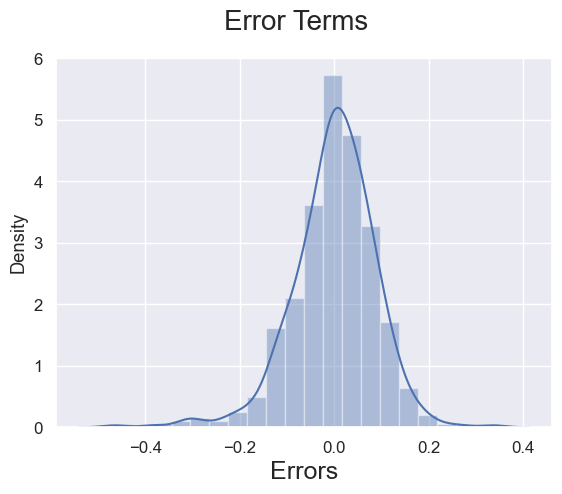

In [577]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

Text(0.5, 0, 'Errors')

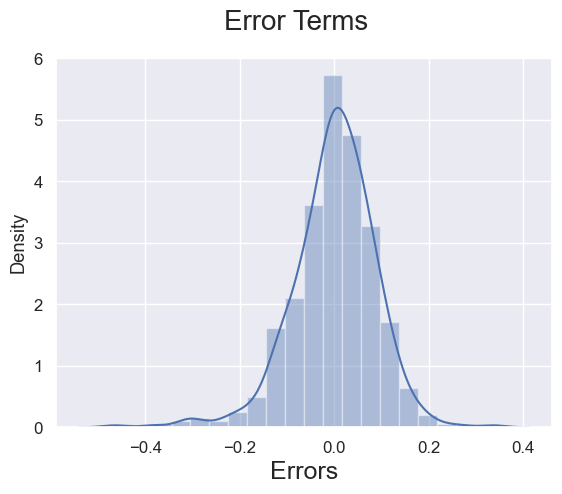

In [578]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

In [579]:
X_train_rfe4

,const,yr,holiday,workingday,temp,windspeed,season_S_spring,season_S_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_Sept,weekday_Monday,weathersit_Mist,weathersit_clear
653,1.0,1,0,1,0.509887,0.300794,0,1,0,0,0,0,0,0,0,1
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0,1
426,1.0,1,0,0,0.442393,0.255342,1,0,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.663106,1,0,1,0,0,0,0,0,0,1
482,1.0,1,0,0,0.395666,0.188475,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.355596,0,0,0,0,0,0,0,0,1,0
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0,1
53,1.0,0,0,1,0.202618,0.111379,1,0,0,0,0,0,0,0,0,1
350,1.0,0,0,0,0.248216,0.431816,0,1,1,0,0,0,0,1,1,0


In [580]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [581]:
df_test[var] = scaler.transform(df_test[var])

In [582]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [583]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
X_train_rfe4=X_train_rfe4.drop(['const'],axis=1)
col2=X_train_rfe4.columns
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_S_spring',
       'season_S_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_Sept', 'weekday_Monday', 'weathersit_Mist',
       'weathersit_clear'],
      dtype='object')

In [584]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe4 = X_test[col2]

In [591]:
# Add a constant to the test set created
X_test_rfe4 = sm.add_constant(X_test_rfe4)
X_test_rfe4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             219 non-null    float64
 1   yr                219 non-null    int64  
 2   holiday           219 non-null    int64  
 3   workingday        219 non-null    int64  
 4   temp              219 non-null    float64
 5   windspeed         219 non-null    float64
 6   season_S_spring   219 non-null    uint8  
 7   season_S_winter   219 non-null    uint8  
 8   mnth_December     219 non-null    uint8  
 9   mnth_January      219 non-null    uint8  
 10  mnth_July         219 non-null    uint8  
 11  mnth_November     219 non-null    uint8  
 12  mnth_Sept         219 non-null    uint8  
 13  weekday_Monday    219 non-null    uint8  
 14  weathersit_Mist   219 non-null    uint8  
 15  weathersit_clear  219 non-null    uint8  
dtypes: float64(3), int64(3), uint8(10)
memory u

In [592]:
y_pred = lm1.predict(X_test_rfe4)

Text(0, 0.5, 'y_pred')

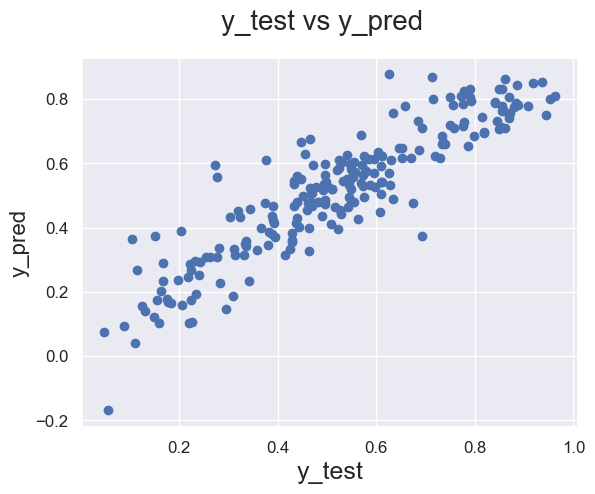

In [593]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [594]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8184974912902651

#### Model with above 15 variables is giving considerabe good results 81.84% r2 score